In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

"""
Calculates probability of responding to alarm and its absence for a range of parameter values
"""
def learnTest(baseparams, paramdex, vals):
    
    # initialize arrays to hold results
    alarm = np.zeros((len(vals), 2))
    noalarm = np.zeros((len(vals), 2))
    
    # create a copy of baseparams that can be changed without changing the original
    params = np.copy(baseparams)
    
    # for each value of the changing parameter, test all conditions
    for v in range(len(vals)):
        # fill this value into the param array
        params[paramdex] = vals[v]
        
        # calculate and store the probability of fleeing in the vigilance only condition
        alarm[v, 0] = params[0]
        # probability of fleeing given alarm in the learning conditions
        alarm[v, 1] = params[0]*params[1]/(params[0]*params[1]+(1-params[0])*params[2])
        
        # probability of foraging in the vigilance only condition
        noalarm[v, 0] = 1-params[0]
        # probability of foraging in the absence of an alarm in the learning conditions
        noalarm[v, 1] = (1-params[0])*(1-params[2])/(params[0]*(1-params[1])+(1-params[0])*(1-params[2]))
        
        # replace all nan with 0s
        np.nan_to_num(alarm, copy = False)
        np.nan_to_num(noalarm, copy = False)
        
    # return the results
    return (alarm, noalarm)


"""
Calculates the probability of reproduction for a range of parameter values
"""
def evolTest(baseparams, paramdex, vals, learning):
    
    # initialize array to hold results
    results = np.zeros((len(vals), 2))
    
    # split learning into alarm and no alarm
    lalarm = learning[0]
    lnoalarm = learning[1]
    
    # create a copy of baseparams that can be changed without altering the original
    params = np.copy(baseparams)
    
    # for each value of the changing parameter, calculate the fitness of all conditions
    for v in range(len(vals)):
        # change the parameter in question to this value
        params[paramdex] = vals[v]
        
        ## calculate the probability of survival
        # first calculate the probability of fleeing given a predator for vigilance and learning
        pfleeing = np.array([lalarm[v,0], params[1]*lalarm[v,1]+(1-params[1])*(1-lnoalarm[v,1])])
        # then calculate the probability of being eaten by a predator on a given step
        peaten = params[0]*(pfleeing*params[5]+(1-pfleeing)*params[4])
        # that can then be used to calculate the probability of surving a whole generation
        psurvival = (1-peaten)**params[6]
        
        ## calculate the probability of reaching the foraging threshold
        # first calculate the probability of an alarm on a given step
        palarm = params[0]*params[1] + (1-params[0])*params[2]
        # then calculate the total probability of foraging on a given step for vigilance and learning
        pforaging = np.array([lnoalarm[v,0], (1-lalarm[v, 1])*palarm + lnoalarm[v, 1]*(1-palarm)])
        # then calculate the probability of reaching the foraging threshold
        pthresh = np.zeros(2)
        for i in range(2):
            pthresh[i] = binom.cdf(params[6]-params[3], params[6], 1-pforaging[i])
        
        # together, they can be used to calculate the probability of reproduction
        results[v, :] = psurvival*pthresh
    
    # replace nan with 0
    np.nan_to_num(results, copy = False)
    
    # return the results
    return results


"""
Creates line graph of provided results
"""
def plotResults(xvals, yvals, name = None, legend = None, pname = None, yname = None):
    for y in range(yvals.shape[1]):
        plt.plot(xvals, yvals[:,y], marker = y)
    if legend is not None:
        plt.legend(legend)
    if pname:
        plt.xlabel(pname)
    else:
        plt.xlabel("Parameter Value")
    if yname:
        plt.ylabel(yname)
    else:
        plt.ylabel("Probability of Response")
    if name:
        plt.title(name)
    plt.ylim(-.1, 1.1)
    plt.show()
    


"""
Manages running the tests and plotting the results
Learning parameters are predator frequency, accurate alarm, and false alarm
Evolution parameters include learning parameters and foraging threshold, predation while foraging and fleeing, and number of steps
"""
def test(paramdex, paramvals, pname, lparams = [.5, .5, .5],
         eparams = [.1, 1, 0, 10, .01, 0, 1000], evol = False):
    # initialize base parameters
    if evol:
        baseparams = eparams
    else:
        baseparams = lparams
    # calculate learning results
    results = learnTest(baseparams, paramdex, paramvals)
    # if testing evolution, calculate fitness too
    if evol:
        results = evolTest(baseparams, paramdex, paramvals, results)
        # and plot fitness
        plotResults(paramvals, results, name = "Effect of " + pname + " on Fitness",
                   legend = ["Vigilance", "Learning"],
                   pname = pname, yname = "Probability of Reproduction")
    # otherwise just plot the results with and without alarm
    else:
        plotResults(paramvals, results[0], name = "Effect of " + pname + " on Response to Alarm",
                    legend = ["Vigilance", "Learning"],
                    pname = pname, yname = "Probability of Fleeing")
        plotResults(paramvals, results[1], name = "Effect of " + pname + " on Response to No Alarm",
                    legend = ["Vigilance", "Learning"],
                    pname = pname, yname = "Probability of Foraging")

# Learning Tests

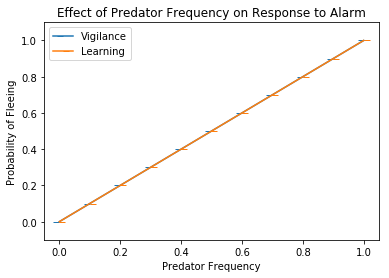

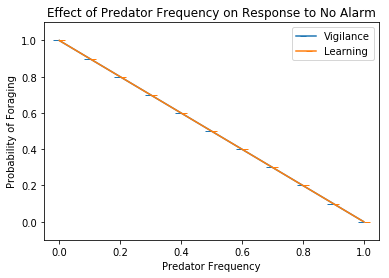

In [2]:
test(0, np.arange(0, 1.1, .1), "Predator Frequency")

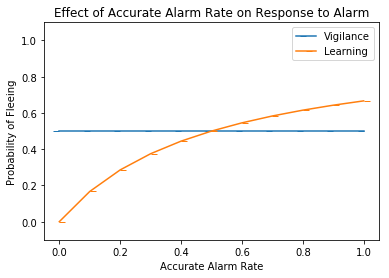

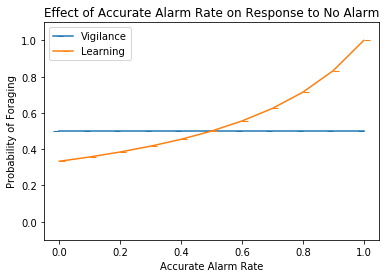

In [3]:
test(1, np.arange(0, 1.1, .1), "Accurate Alarm Rate")

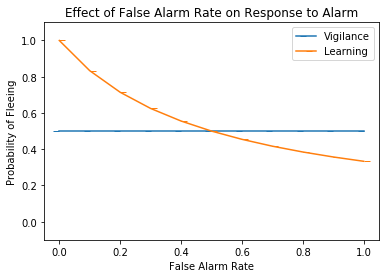

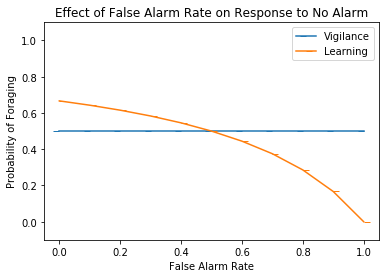

In [4]:
test(2, np.arange(0, 1.1, .1), "False Alarm Rate")

# Evolution Tests

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


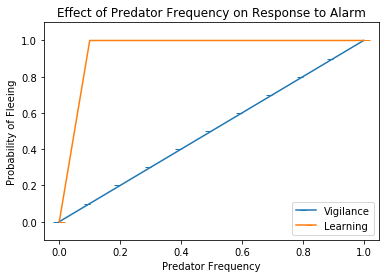

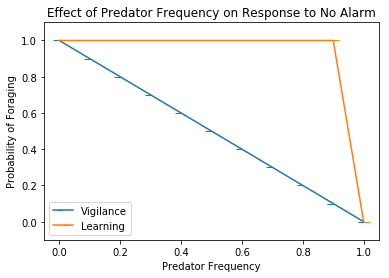

In [5]:
test(0, np.arange(0, 1.1, .1), "Predator Frequency", lparams = [.1, 1, 0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


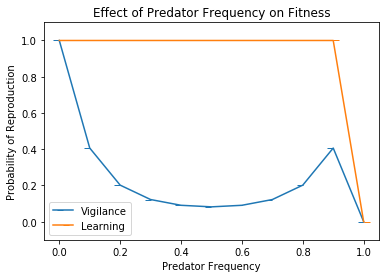

In [6]:
test(0, np.arange(0, 1.1, .1), "Predator Frequency", evol = True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


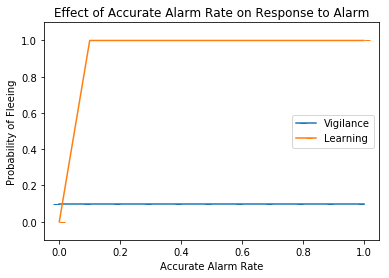

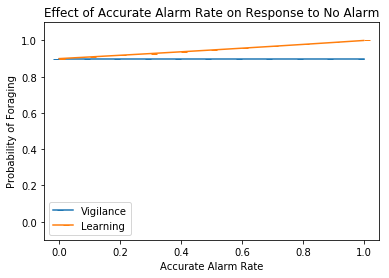

In [7]:
test(1, np.arange(0, 1.1, .1), "Accurate Alarm Rate", lparams = [.1, 1, 0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


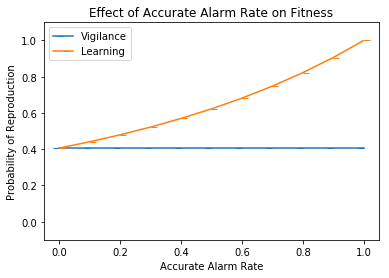

In [8]:
test(1, np.arange(0, 1.1, .1), "Accurate Alarm Rate", evol = True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


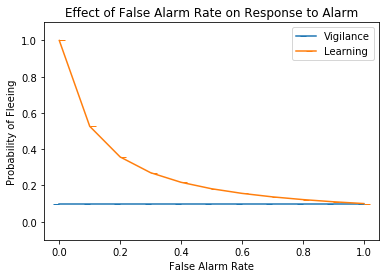

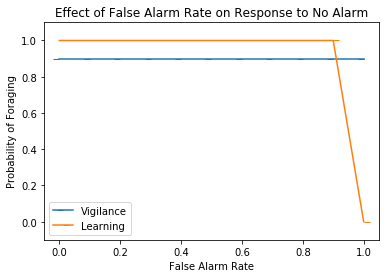

In [9]:
test(2, np.arange(0, 1.1, .1), "False Alarm Rate", lparams = [.1, 1, 0])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


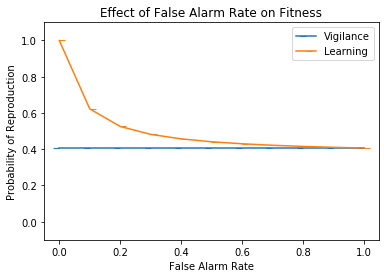

In [10]:
test(2, np.arange(0, 1.1, .1), "False Alarm Rate", evol = True)

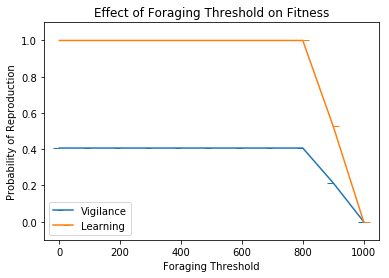

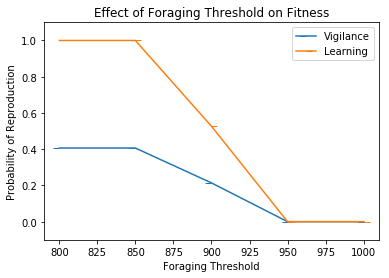

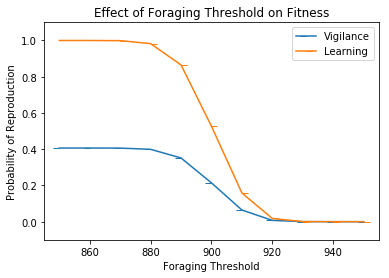

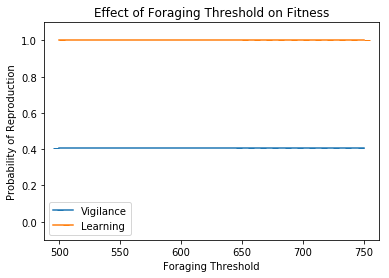

In [3]:
test(3, np.arange(0, 1100, 100), "Foraging Threshold", evol = True)
test(3, np.arange(800, 1050, 50), "Foraging Threshold", evol = True)
test(3, np.arange(850, 960, 10), "Foraging Threshold", evol = True)
test(3, np.array([500, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750]), "Foraging Threshold", evol = True)

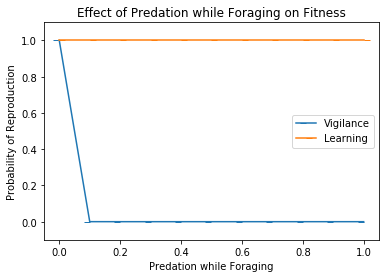

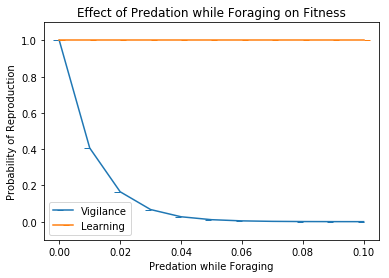

In [12]:
test(4, np.arange(0, 1.1, .1), "Predation while Foraging", evol = True)
test(4, np.arange(0, .11, .01), "Predation while Foraging", evol = True)

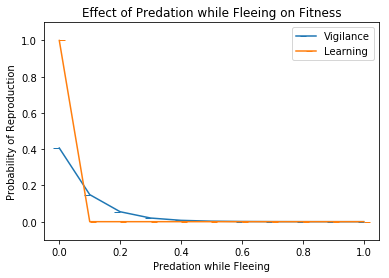

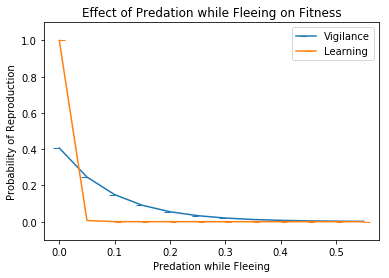

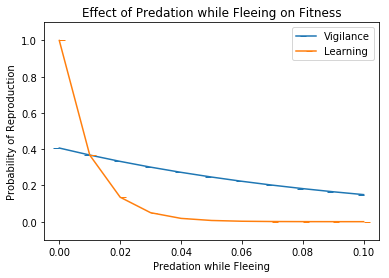

In [13]:
test(5, np.arange(0, 1.1, .1), "Predation while Fleeing", evol = True)
test(5, np.arange(0, .6, .05), "Predation while Fleeing", evol = True)
test(5, np.arange(0, .11, .01), "Predation while Fleeing", evol = True)

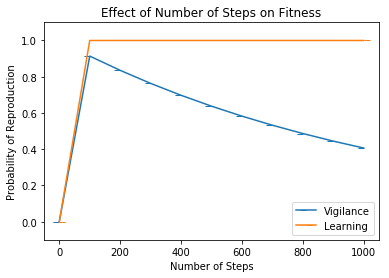

In [14]:
test(6, np.arange(0, 1100, 100), "Number of Steps", evol = True)